In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import glob
import cv2

images = [cv2.imread(file) for file in glob.glob("./images/*.jpg")]
m=len(images)
for i in range(m):
    
    images[i]=cv2.resize(images[i],(400,400))
    images[i].shape=(400*400*3,1)
    



In [4]:



def inititializecentroids(num_clusters):
    centroids=[]
    for i in range(num_clusters):
        random = np.random.randint(low=0 ,high=255 ,size=(400*400*3,1))
        centroids.append(random)
    return centroids



In [5]:

def assign_nearest_centroid(centroids,images,nearest_centroid,num_clusters,m):
    
    
    for i in range(m):
        temp=None
        distance=None
        nearest_centroid.append(0)
        for j in range(num_clusters):
            dist=np.linalg.norm(images[i]-centroids[j])
            if distance is None:
                distance=dist
                nearest_centroid[i]=j
            elif distance>=dist:
                distance=dist
                nearest_centroid[i]=j
    return nearest_centroid


In [6]:
def update_centroid(centroids,images,nearest_centroid,num_clusters,m):
    mu=[]
    sizes=[]
    for i in range(num_clusters):
        mu.append(np.zeros((400*400*3,1), dtype = int))
        sizes.append(1)
    
    for i in range(m):
        
        mu[nearest_centroid[i]]=mu[nearest_centroid[i]]+images[i]
        sizes[nearest_centroid[i]]=sizes[nearest_centroid[i]]+1
        
    for i in range(num_clusters):
        mu[i]=(mu[i]/sizes[i]).astype(int)
    
    return mu

# Training the model

In [ ]:
nearest_centroid=[]
num_clusters=5
m=len(images)
minj=None
#final_centroids=None
#final_nc=None
for r in range(2):

    centroids=inititializecentroids(num_clusters)
    for i in range(15):
        
        nearest_centroid=assign_nearest_centroid(centroids,images,nearest_centroid,num_clusters,m)
        centroids=update_centroid(centroids,images,nearest_centroid,num_clusters,m)
    jt=sum([np.linalg.norm(images[j]-centroids[nearest_centroid[j]]) for j in range(m)])
    if minj is None or minj<jt:
        minj=jt
        final_centroids=centroids.copy()
        final_nc=nearest_centroid.copy()
        
    
centroids=final_centroids
nearest_centroid=final_nc

In [8]:

import os



for i in range(m):
    
        #print(i)
        directory = r'C:\Users\mahab\Desktop\Newfolder\aaRayyan\ML Project\Imageclustering\classified\category{}'.format(nearest_centroid[i])
        os.chdir(directory)
       
        images[i].shape=(400,400,3)
        filename = 'savedImage{}.jpg'.format(i+1)
  


        cv2.imwrite(filename, images[i])
        images[i].shape=(400*400*3,1)
    
        

    
    

print(os.listdir(directory))

['savedImage12.jpg', 'savedImage13.jpg', 'savedImage14.jpg', 'savedImage15.jpg', 'savedImage16.jpg', 'savedImage17.jpg', 'savedImage18.jpg', 'savedImage19.jpg', 'savedImage2.jpg', 'savedImage21.jpg', 'savedImage23.jpg', 'savedImage24.jpg', 'savedImage27.jpg', 'savedImage28.jpg', 'savedImage3.jpg', 'savedImage30.jpg', 'savedImage31.jpg', 'savedImage32.jpg', 'savedImage33.jpg', 'savedImage34.jpg', 'savedImage35.jpg', 'savedImage36.jpg', 'savedImage37.jpg', 'savedImage38.jpg', 'savedImage39.jpg', 'savedImage40.jpg', 'savedImage41.jpg', 'savedImage43.jpg', 'savedImage44.jpg', 'savedImage46.jpg', 'savedImage47.jpg', 'savedImage48.jpg', 'savedImage5.jpg', 'savedImage50.jpg', 'savedImage51.jpg', 'savedImage52.jpg', 'savedImage53.jpg', 'savedImage54.jpg', 'savedImage55.jpg', 'savedImage58.jpg', 'savedImage59.jpg', 'savedImage6.jpg', 'savedImage60.jpg', 'savedImage61.jpg', 'savedImage62.jpg', 'savedImage63.jpg', 'savedImage64.jpg', 'savedImage7.jpg', 'savedImage70.jpg', 'savedImage71.jpg', 'sav

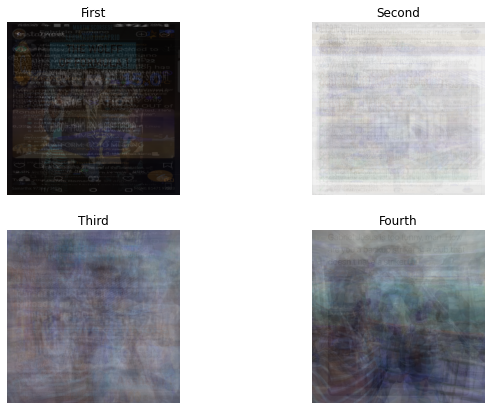

In [9]:
rows=2
columns=2
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(rows, columns, 1)

centroids[1].shape=(400,400,3)
plt.imshow(centroids[1])
plt.axis('off')
plt.title("First")
centroids[1].shape=(400*400*3,1)
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
centroids[2].shape=(400,400,3)
plt.imshow(centroids[2])
plt.axis('off')
plt.title("Second")
centroids[2].shape=(400*400*3,1)
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
centroids[3].shape=(400,400,3)
plt.imshow(centroids[3])
plt.axis('off')
plt.title("Third")
centroids[3].shape=(400*400*3,1)
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
centroids[4].shape=(400,400,3)
plt.imshow(centroids[4])
plt.axis('off')
plt.title("Fourth")
centroids[4].shape=(400*400*3,1)

# To choose optimal number of clusters by plotting (cost vs number_of_clusters)

In [ ]:
directory = r'C:\Users\mahab\Desktop\Newfolder\aaRayyan\ML Project\Imageclustering'
os.chdir(directory)


images = [cv2.imread(file) for file in glob.glob("./images/*.jpg")]
m=len(images)
for i in range(m):
    
    images[i]=cv2.resize(images[i],(400,400))
    images[i].shape=(400*400*3,1)



mc=10
J=[]
k=[]
for i in range(1,mc,1):
    centroids=[]
    nearest_centroid=[]
    
    minj=None
    for r in range(20):
        
        centroids=inititializecentroids(i)
        for l in range(15):
        
            nearest_centroid=assign_nearest_centroid(centroids,images,nearest_centroid,i,m)
            centroids=update_centroid(centroids,images,nearest_centroid,i,m)
        jt1=sum([np.linalg.norm(images[j]-centroids[nearest_centroid[j]]) for j in range(m)])
        if minj is None or minj<jt:
            minj=jt1
            final_centroids=centroids.copy()
            final_nc=nearest_centroid.copy()
        
    
    centroids=final_centroids
    nearest_centroid=final_nc
    
    
    
    jt=sum([np.linalg.norm(images[j]-centroids[nearest_centroid[j]]) for j in range(m)])
    J.append(jt/m)
    k.append(i)


plt.plot(k,J)
plt.show()

print(J)

